***DATA VISUALIZATION***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = "white", color_codes = True)

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import yfinance as yf


In [24]:
symbol ='AAPL'
start = '2014-01-01'
end = '2024-01-01'

dataset = yf.download(symbol, start, end)
dataset.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2014-01-02,17.192823,17.314047,17.158322,17.272085,234684800
2014-01-03,16.815166,17.210539,16.798070,17.184430,392467600
2014-01-06,16.906862,16.996069,16.585777,16.705446,412610800
2014-01-07,16.785944,16.969953,16.720049,16.918978,317209200
2014-01-08,16.892256,16.957529,16.743991,16.747720,258529600


In [26]:
print(dataset.index.name)


Date


In [27]:
dataset.index = pd.to_datetime(dataset.index)

In [28]:
dataset.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2014-01-02,17.192823,17.314047,17.158322,17.272085,234684800
2014-01-03,16.815166,17.210539,16.798070,17.184430,392467600
2014-01-06,16.906862,16.996069,16.585777,16.705446,412610800
2014-01-07,16.785944,16.969953,16.720049,16.918978,317209200
2014-01-08,16.892256,16.957529,16.743991,16.747720,258529600


In [41]:
dataset['Increase_decrease'] = np.where(dataset['Volume'].shift(-1) > dataset['Volume'], 'Increase', 'Decrease')
dataset['Buy_Sell_on_Open'] = np.where(dataset['Open'].shift(-1) > dataset['Open'],1,0)
dataset['Buy_Sell'] = np.where(dataset['Close'].shift(-1) > dataset['Close'],1,0)
dataset = dataset.dropna()

dataset.head()

Price,Close,High,Low,Open,Volume,Increase_decrease,Buy_Sell_on_Open,Buy_Sell
Date,,,,,,,,
2014-01-02,17.192823,17.314047,17.158322,17.272085,234684800,Increase,0,0
2014-01-03,16.815166,17.210539,16.798070,17.184430,392467600,Increase,0,1
2014-01-06,16.906862,16.996069,16.585777,16.705446,412610800,Decrease,1,0
2014-01-07,16.785944,16.969953,16.720049,16.918978,317209200,Decrease,0,1
2014-01-08,16.892256,16.957529,16.743991,16.747720,258529600,Increase,1,0


<Axes: xlabel='Date'>

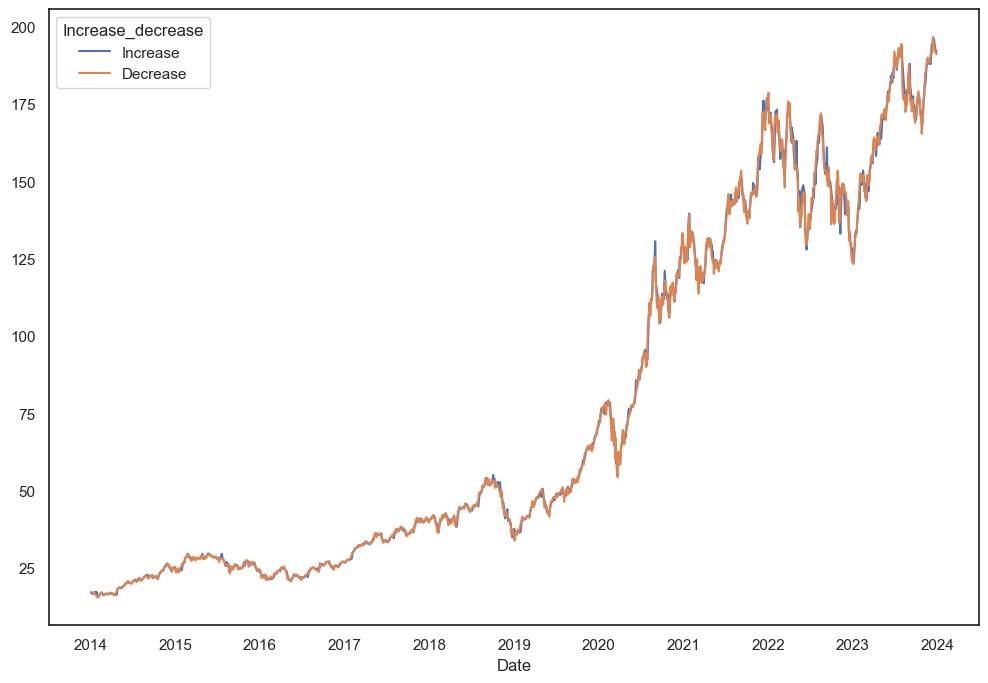

In [7]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
sns.lineplot(x=dataset.index, y=dataset['Close'].values.ravel(), hue = "Increase_decrease", data = dataset)

<Axes: xlabel='Date'>

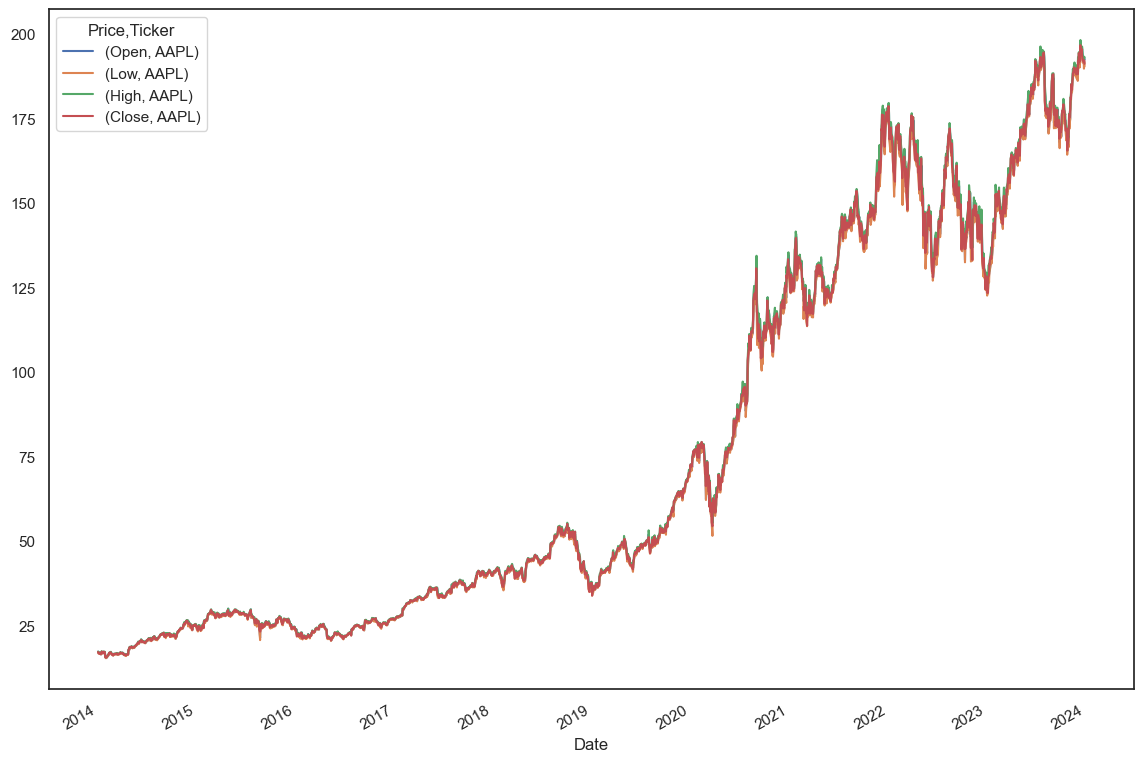

In [12]:
fig, ax = plt.subplots()
fig.set_size_inches(14, 10)
dataset[['Open', 'Low', 'High', 'Close']].plot(ax = ax)

In [13]:
dataset['Increase_decrease'].value_counts()

Increase_decrease
Decrease    1318
Increase    1198
Name: count, dtype: int64

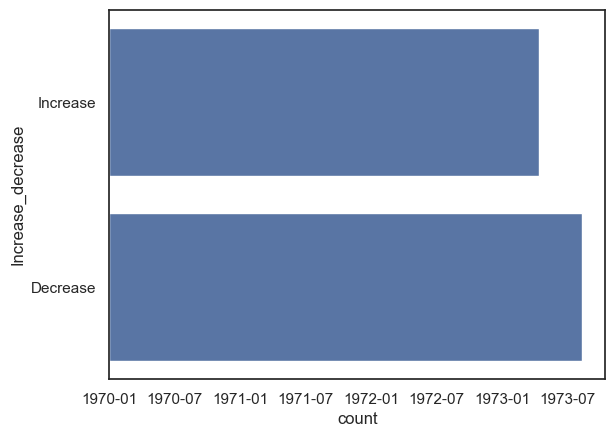

In [14]:
ax = sns.countplot(dataset['Increase_decrease'], label = 'Count')

<Axes: xlabel='Open', ylabel='Close'>

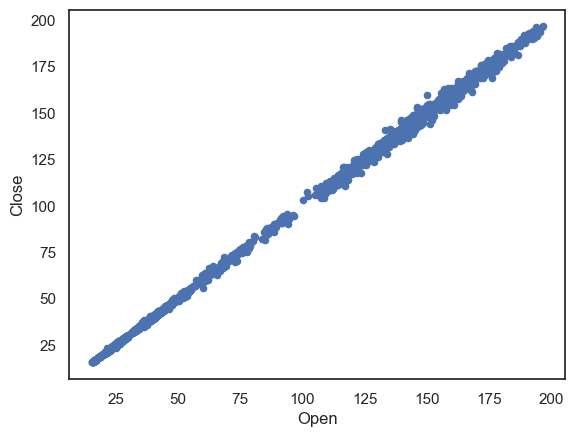

In [15]:
#Scatter Plot
dataset.plot(kind = 'scatter', x = 'Open', y = 'Close')

In [37]:
#The error you're encountering is due to multi-level (hierarchical) column names in your plot_data DataFrame.
#This shows that your DataFrame has two levels of column headers — Price and Ticker, with Open and Close both under Price and corresponding to the ticker AAPL.
#You need to flatten the column headers so that Seaborn can correctly interpret column names.
plot_data = dataset[['Open', 'Close']].dropna()
plot_data.columns = plot_data.columns.get_level_values(0)
plot_data.columns

Index(['Open', 'Close'], dtype='object', name='Price')

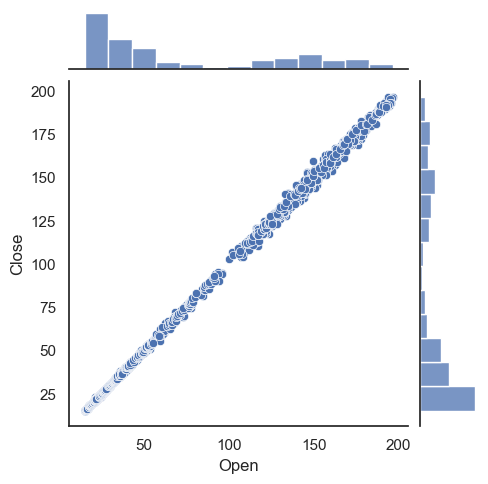

In [36]:
#bivariate scatterplots and univariate histograms

sns.jointplot(x = 'Open', y = 'Close', data = plot_data, height = 5)

In [42]:
#The error you're encountering is due to multi-level (hierarchical) column names in your plot_data DataFrame.
#This shows that your DataFrame has two levels of column headers — Price and Ticker, with Open and Close both under Price and corresponding to the ticker AAPL.
#You need to flatten the column headers so that Seaborn can correctly interpret column names.
dataset.columns = dataset.columns.get_level_values(0)
dataset.columns

Index(['Close', 'High', 'Low', 'Open', 'Volume', 'Increase_decrease',
       'Buy_Sell_on_Open', 'Buy_Sell'],
      dtype='object', name='Price')

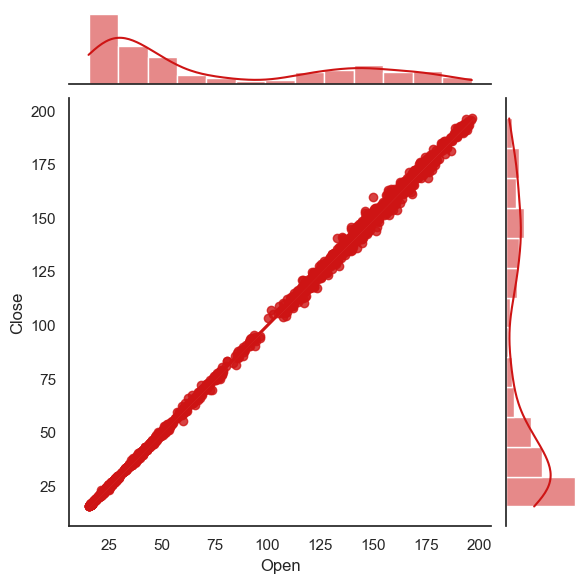

In [40]:
sns.jointplot(x = dataset.loc[:, 'Open'], y = dataset.loc[:,'Close'], data = dataset, kind = "reg", color = '#ce1414' )

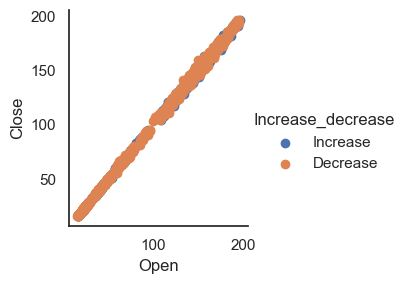

In [44]:
sns.FacetGrid(dataset, hue = 'Increase_decrease').map(plt.scatter, 'Open', 'Close').add_legend()

<Axes: xlabel='Increase_decrease', ylabel='Close'>

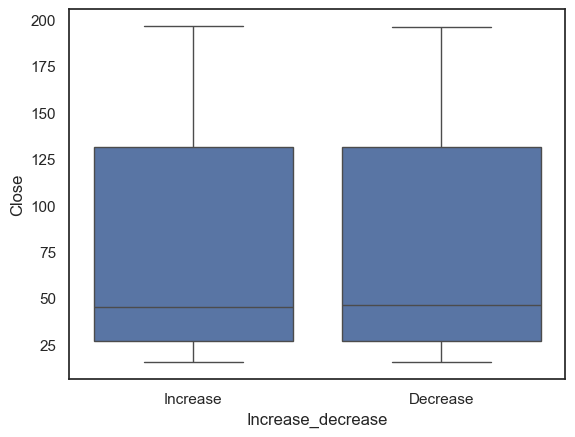

In [45]:
#Boxplot
sns.boxplot(x = 'Increase_decrease', y = dataset['Close'], data = dataset)

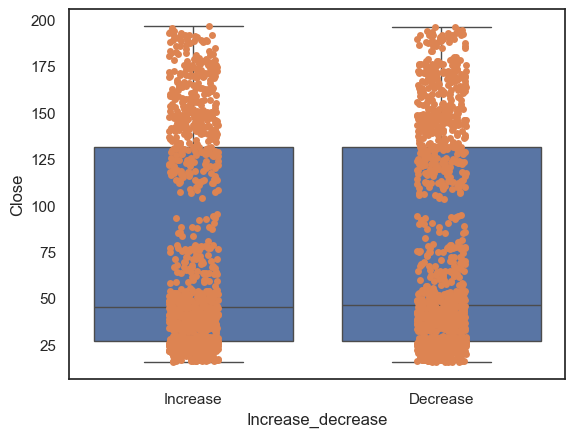

In [46]:
ax = sns.boxplot(x = 'Increase_decrease', y = dataset['Close'], data = dataset)
ax = sns.stripplot(x = 'Increase_decrease', y = dataset['Close'], data = dataset, jitter = True, edgecolor= 'gray')

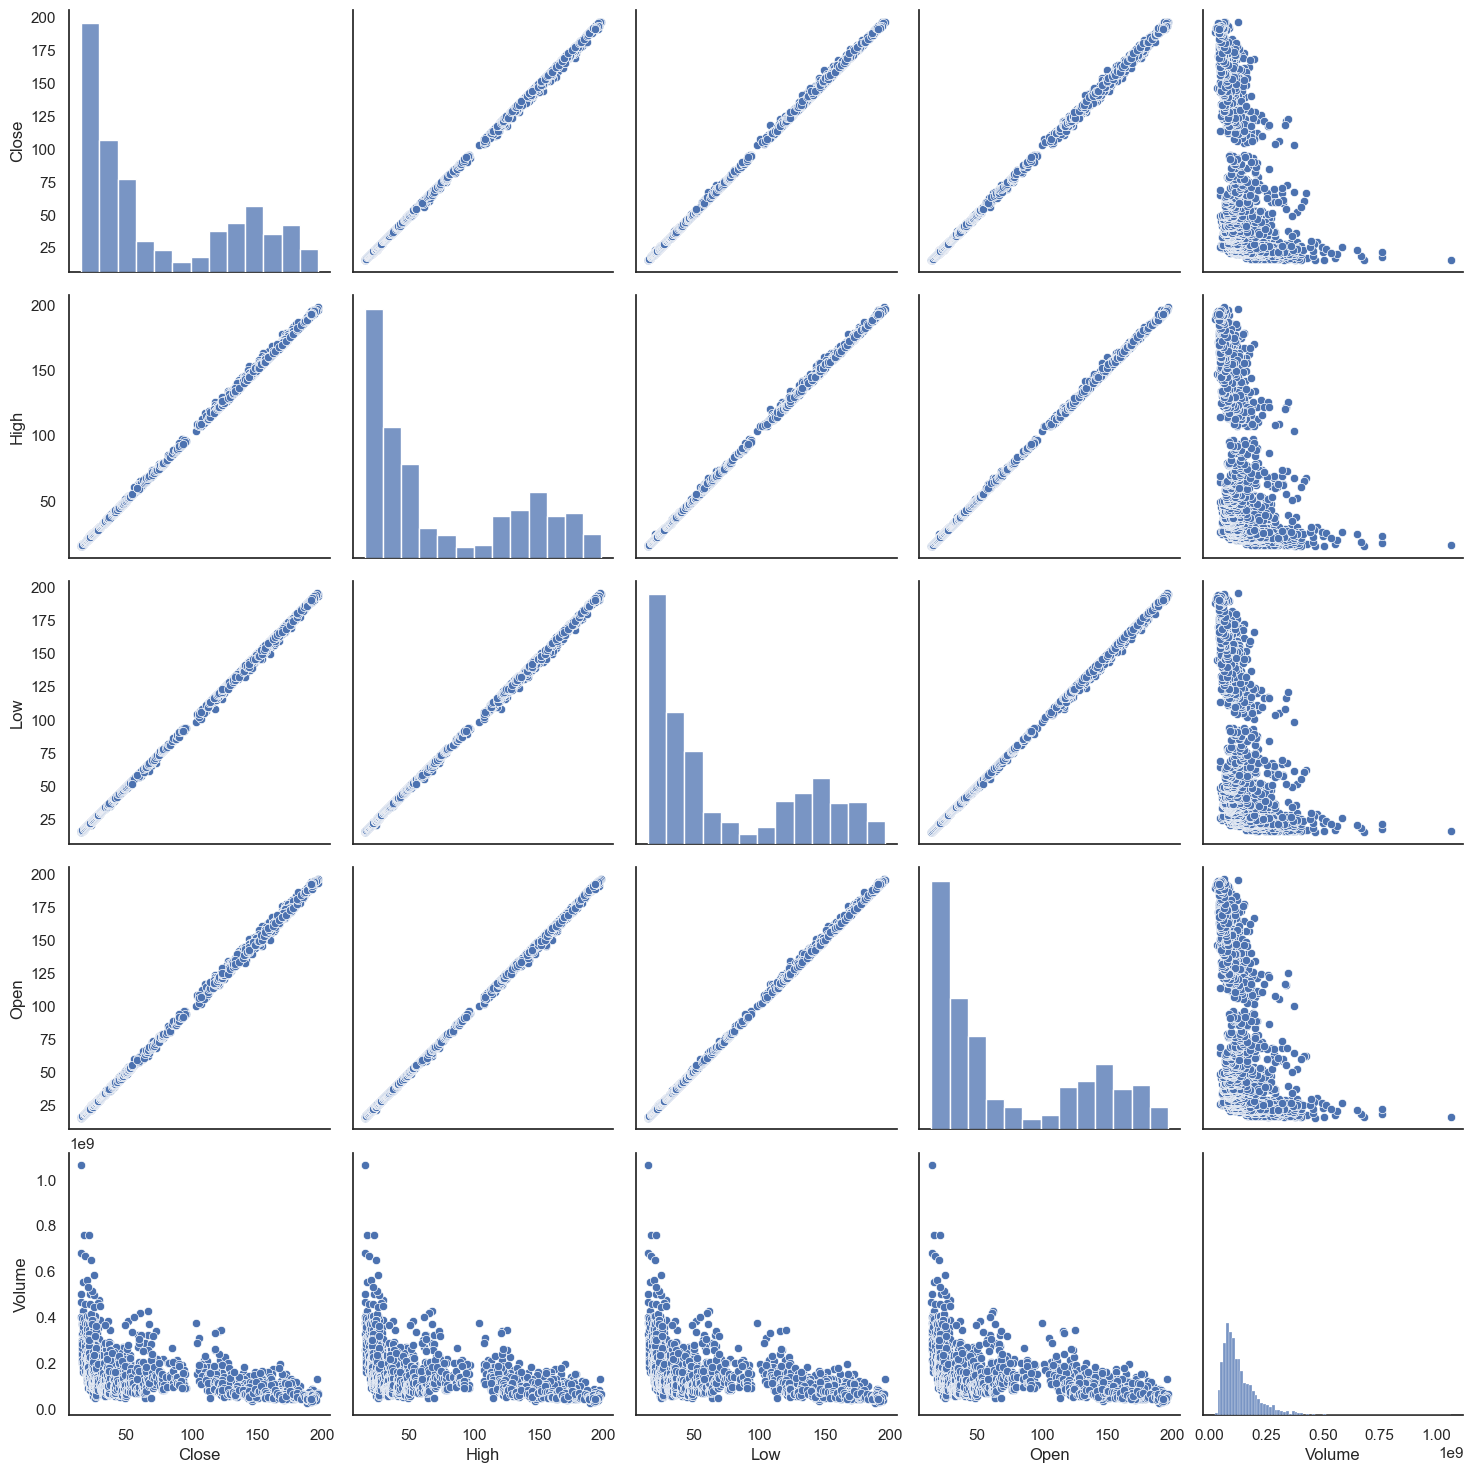

In [47]:
sns.pairplot(dataset.drop(['Increase_decrease', 'Buy_Sell_on_Open', 'Buy_Sell'], axis = 1), size = 3)

array([[<Axes: title={'center': 'Buy_Sell'}, xlabel='[Increase_decrease]'>,
        <Axes: title={'center': 'Buy_Sell_on_Open'}, xlabel='[Increase_decrease]'>,
        <Axes: title={'center': 'Close'}, xlabel='[Increase_decrease]'>],
       [<Axes: title={'center': 'High'}, xlabel='[Increase_decrease]'>,
        <Axes: title={'center': 'Low'}, xlabel='[Increase_decrease]'>,
        <Axes: title={'center': 'Open'}, xlabel='[Increase_decrease]'>],
       [<Axes: title={'center': 'Volume'}, xlabel='[Increase_decrease]'>,
        <Axes: >, <Axes: >]], dtype=object)

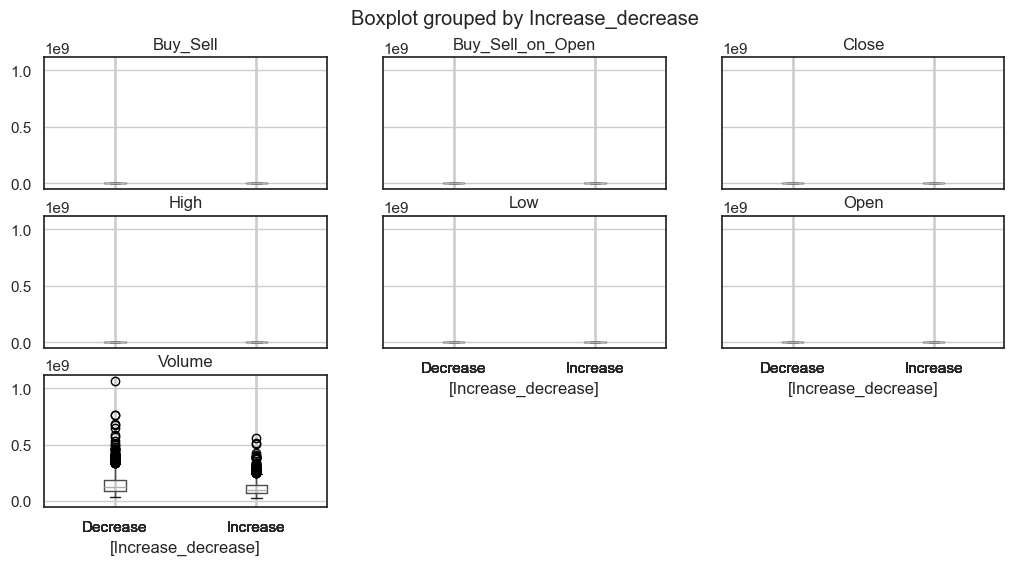

In [48]:
dataset.boxplot(by = 'Increase_decrease', figsize = (12, 6))

<Axes: >

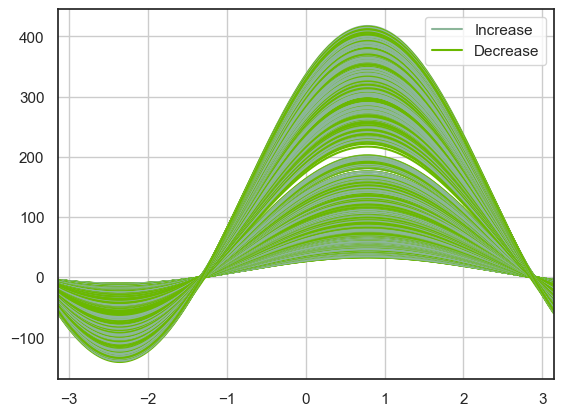

In [51]:
from pandas.plotting import andrews_curves

andrews_curves(dataset[['Open', 'Close', 'Increase_decrease']], 'Increase_decrease')

<Axes: >

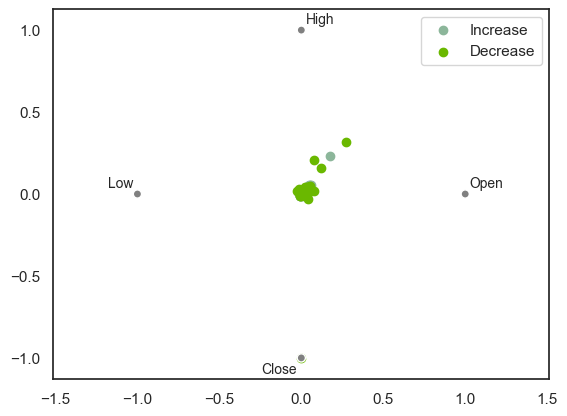

In [52]:
from pandas.plotting import radviz

radviz(dataset[['Open', 'High', 'Low', 'Close', 'Increase_decrease']], 'Increase_decrease')

In [53]:
###Time series plots


<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

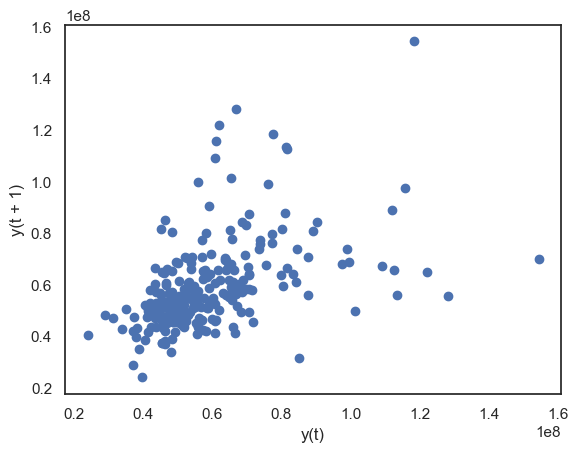

In [54]:
from pandas.plotting import lag_plot

lag_plot(dataset['Volume'].tail(250))

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

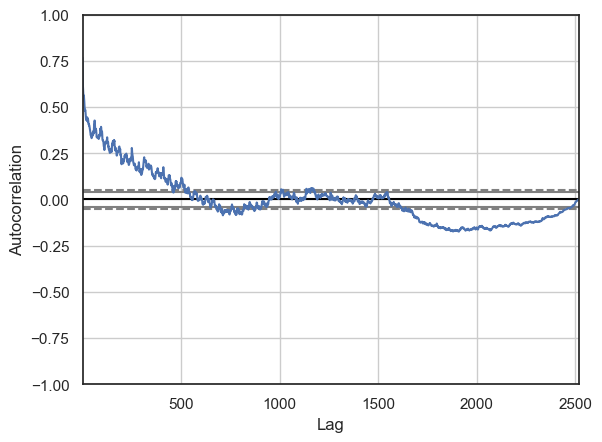

In [55]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(dataset['Volume'])

<Axes: xlabel='Date'>

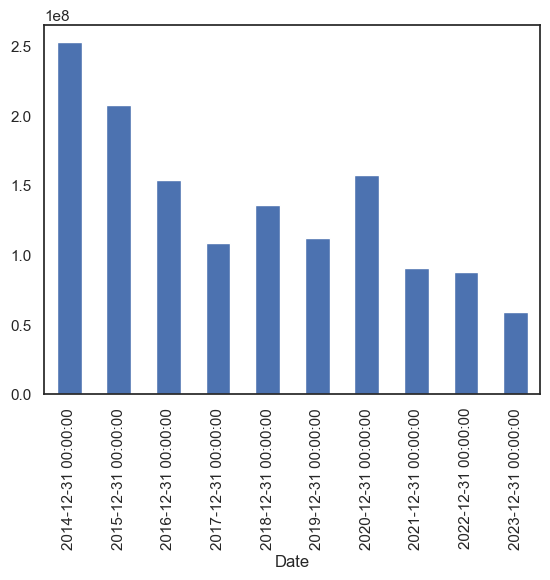

In [56]:
dataset['Volume'].resample('Y').mean().plot.bar()

<Axes: xlabel='Price', ylabel='Price'>

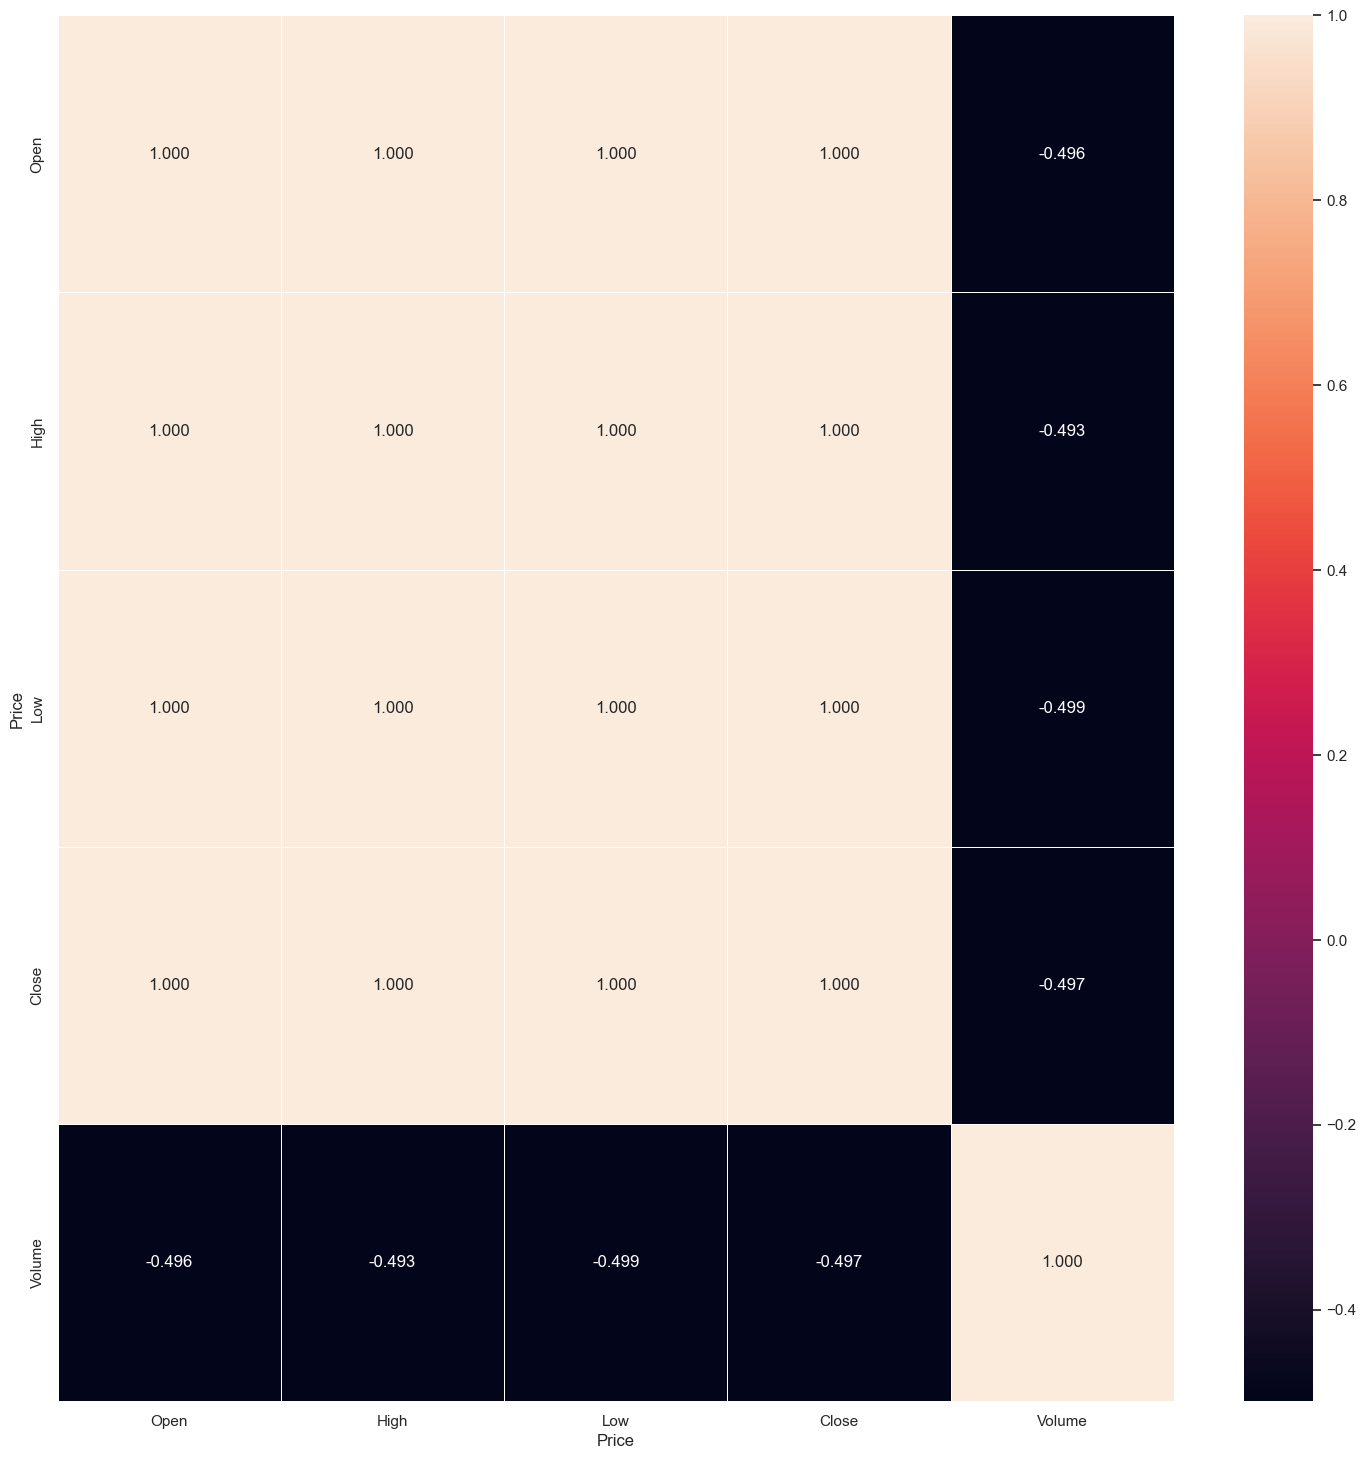

In [58]:
f, ax = plt.subplots(figsize = (18, 18))
sns.heatmap(dataset[['Open', 'High', 'Low', 'Close', 'Volume']].corr(), annot=True, linewidths= 0.5, fmt= '.3f', ax = ax)